<a href="https://colab.research.google.com/github/yoe174/Pembelajaran-Mesin_27_3C/blob/main/JS11_ML_Yonatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 11 : Convolutional Neural Network (CNN)**

Nama : Yonatan Efrassetyo - 27

Kelas : TI-3C

## Praktikum 1

### Langkah 1 - Import Library

In [ ]:
!pip install tf-keras

In [ ]:
# Unggah file kaggle.json dari komputer lokal
from google.colab import files
files.upload()

# Membuat direktori .kaggle dan memindahkan kaggle.json ke dalamnya
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset anjing dan kucing dari Kaggle (ganti dengan dataset yang sesuai)
!kaggle datasets download -d 'tongpython/cat-and-dog'

# Ekstrak dataset
!unzip cat-and-dog.zip -d ./dataset


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: ./dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: ./dataset/training_set/training_set/cats/cat.3715.jpg  
  inflating: ./dataset/training_set/training_

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

#### Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


#### Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN

#### Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 24s 92ms/step - loss: 0.6848 - accuracy: 0.5669 - val_loss: 0.6266 - val_accuracy: 0.6421
Epoch 2/25
251/251 [==============================] - 23s 91ms/step - loss: 0.6229 - accuracy: 0.6456 - val_loss: 0.5839 - val_accuracy: 0.7049
Epoch 3/25
251/251 [==============================] - 23s 90ms/step - loss: 0.5847 - accuracy: 0.6881 - val_loss: 0.5985 - val_accuracy: 0.6906
Epoch 4/25
251/251 [==============================] - 22s 87ms/step - loss: 0.5436 - accuracy: 0.7239 - val_loss: 0.5133 - val_accuracy: 0.7509
Epoch 5/25
251/251 [==============================] - 22s 88ms/step - loss: 0.5198 - accuracy: 0.7395 - val_loss: 0.5704 - val_accuracy: 0.7192
Epoch 6/25
251/251 [==============================] - 22s 89ms/step - loss: 0.5004 - accuracy: 0.7533 - val_loss: 0.4937 - val_accuracy: 0.7662
Epoch 7/25
251/251 [==============================] - 23s 91ms/step - loss: 0.4835 - accuracy: 0.7654 - val_loss: 0.4765 - val_accuracy:

### Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 25ms/step


## Praktikum 2

### Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Langkah 3 - Verifikasi Data

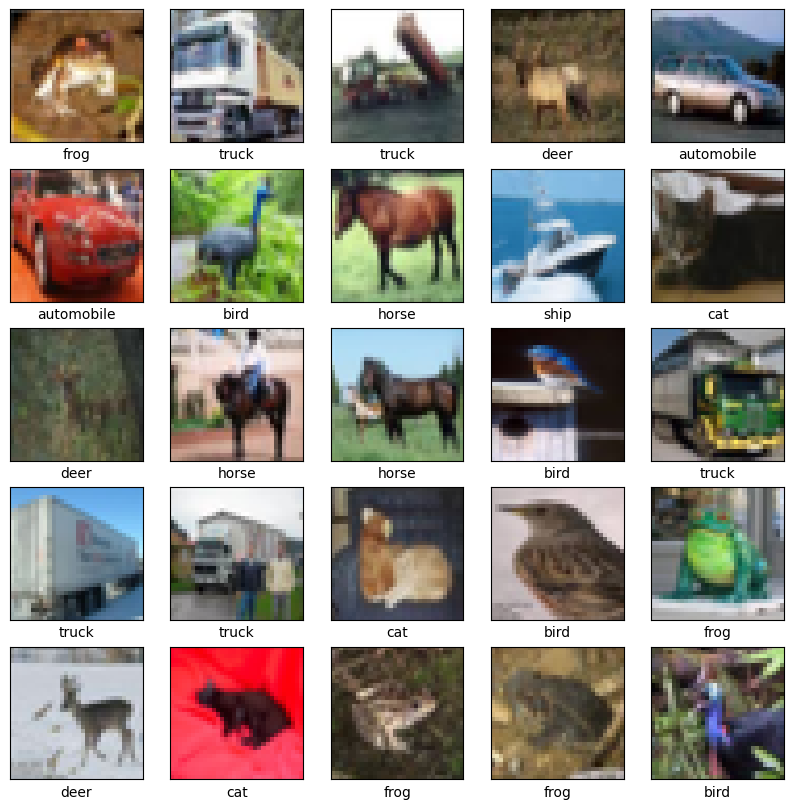

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#### Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#### Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1234 - accuracy: 0.9563 - val_loss: 2.3422 - val_accuracy: 0.6764
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1315 - accuracy: 0.9547 - val_loss: 2.4758 - val_accuracy: 0.6784
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1176 - accuracy: 0.9579 - val_loss: 2.4061 - val_accuracy: 0.6817
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1237 - accuracy: 0.9578 - val_loss: 2.5270 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1143 - accuracy: 0.9605 - val_loss: 2.5366 - val_accuracy: 0.6813
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1137 - accuracy: 0.9609 - val_loss: 2.4968 - val_accuracy: 0.6783
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1190 - accuracy: 0.9585 - val_loss: 2.5427 - val_ac

### Langkah 6 - Evaluasi Model

313/313 - 1s - loss: 2.6549 - accuracy: 0.6819 - 1s/epoch - 3ms/step


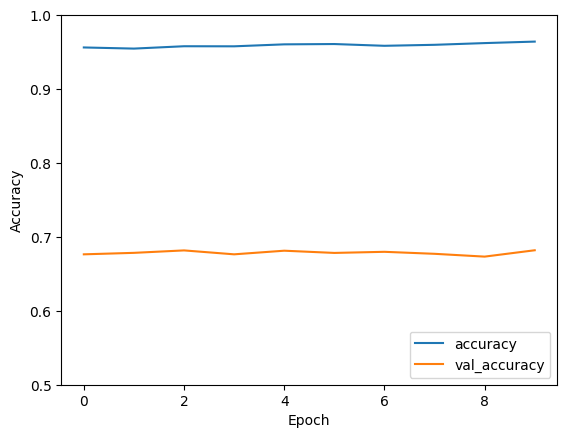

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.6819000244140625
